In [69]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [70]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [71]:
df=pd.read_csv("금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [72]:
df.head()

,금리,달러환율
일자,,
2016-07-01,1.210,1152.6
2016-07-04,1.224,1147.5
2016-07-05,1.217,1148.1
2016-07-06,1.203,1153.0
2016-07-07,1.208,1165.8


In [73]:
df.shape

(1171, 2)

In [74]:
df.describe()

,금리,달러환율
count,1171.000000,1171.000000
mean,1.551944,1142.347822
std,0.436781,42.534172
min,0.795000,1057.600000
25%,1.204000,1117.000000
50%,1.654000,1133.400000
75%,1.835000,1177.650000
max,2.316000,1280.100000


In [75]:
df.info

<bound method DataFrame.info of                금리    달러환율
일자                       
2016-07-01  1.210  1152.6
2016-07-04  1.224  1147.5
2016-07-05  1.217  1148.1
2016-07-06  1.203  1153.0
2016-07-07  1.208  1165.8
...           ...     ...
2021-03-25  1.089  1133.5
2021-03-26  1.117  1134.2
2021-03-29  1.119  1131.8
2021-03-30  1.155  1131.7
2021-03-31  1.133  1133.5

[1171 rows x 2 columns]>

In [76]:
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, '금리')

Text(0, 0.5, 'rate')

Text(0.5, 0, 'Date')

Text(0.5, 1.0, ' 달러환율')

Text(0, 0.5, 'rate')

Text(0.5, 0, 'Date')

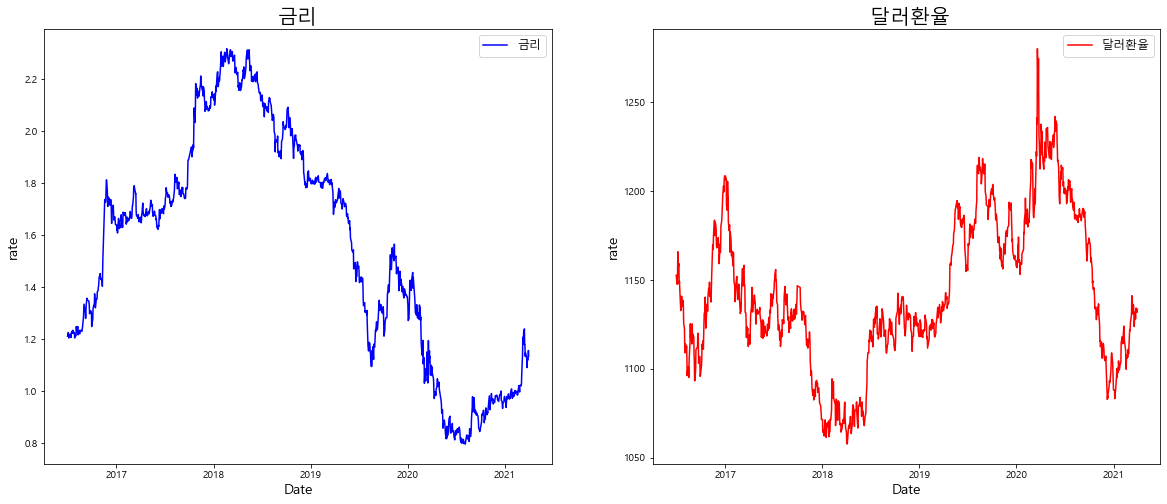

In [77]:
fig = plt.figure(figsize=(20, 8)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,2,1) # subplot 생성
bx = fig.add_subplot(1,2,2)

ax.plot(df['금리'], label='금리', color='b')
bx.plot(df['달러환율'], label='달러환율', color='r')

ax.set_title('금리', fontsize=20) # 타이틀 설정
ax.set_ylabel('rate', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y축 설정

bx.set_title(' 달러환율', fontsize=20) # 타이틀 설정
bx.set_ylabel('rate', fontsize=14) # x축 설정
bx.set_xlabel('Date', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디
bx.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

In [78]:
fig.savefig('금리와 달러환율.png',bbox_inches='tight')

In [79]:
df1=pd.read_csv("당기순익_merge.csv",index_col='결산년도',encoding='euc-kr')

In [80]:
df1.head()

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
결산년도,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0


In [81]:
df1.info

<bound method DataFrame.info of               KB 금융  LG 생활건강    LG 화학   NAVER   SK 텔레콤    삼성물산  삼성바이오로직스  \
결산년도                                                                       
16년09월(3Q)   5774.0   1921.0   2974.0  1980.0   3221.0  1446.0       0.0   
16년12월(4Q)   4631.0    671.0   2700.0  1828.0   4747.0  2583.0    -570.0   
17년03월(1Q)   8876.0   1805.0   5481.0  2109.0   5835.0  1876.0    -331.0   
17년06월(2Q)  10047.0   1682.0   5903.0  1714.0   6205.0  1097.0    -221.0   
17년09월(3Q)   8974.0   1876.0   5455.0  2158.0   7930.0  1314.0    -317.0   
17년12월(4Q)   5537.0    820.0   3381.0  1720.0   6606.0   524.0    -101.0   
18년03월(1Q)   9684.0   1964.0   5527.0  1538.0   6934.0  3759.0    -467.0   
18년06월(2Q)   9468.0   1874.0   4934.0  2818.0   9143.0  3321.0    -195.0   
18년09월(3Q)   9540.0   2072.0   3466.0   684.0  10498.0  2357.0    -270.0   
18년12월(4Q)   1928.0   1013.0   1266.0  1240.0   4745.0  8046.0    3173.0   
19년03월(1Q)   8459.0   2258.0   2119.0   876.0   3736.0  

In [82]:
df1.describe()

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,8182.368421,1805.210526,3441.157895,1768.868421,5010.421053,3014.473684,222.052632,80761.000000,235.684211,1806.210526,4880.842105,7900.789474
std,2717.263231,528.996910,3520.681583,914.193267,2556.990121,2111.800611,845.583985,28632.600507,116.248323,10469.457147,2055.888920,4790.150318
min,1928.000000,671.000000,-3434.000000,278.000000,-464.000000,524.000000,-570.000000,45379.000000,-72.000000,-13468.000000,-1686.000000,-2033.000000
25%,5770.000000,1554.000000,1319.000000,1073.500000,3444.500000,1975.000000,-293.500000,53910.500000,167.000000,-5774.500000,4347.000000,5066.000000
50%,8974.000000,1921.000000,3381.000000,1720.000000,4745.000000,2583.000000,-101.000000,71417.000000,234.000000,2029.000000,4858.000000,9136.000000
75%,9799.500000,2143.000000,5468.000000,2133.500000,6405.500000,3393.500000,540.500000,110486.500000,320.500000,6610.000000,5927.000000,10938.000000
max,12852.000000,2588.000000,13710.000000,3841.000000,10498.000000,8867.000000,3173.000000,131507.000000,398.000000,29382.000000,7619.000000,15222.000000


<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

Text(0.5, 1.0, '공매도 수량과 잔고수량')

Text(0, 0.5, 'Account')

Text(0.5, 0, 'Date')

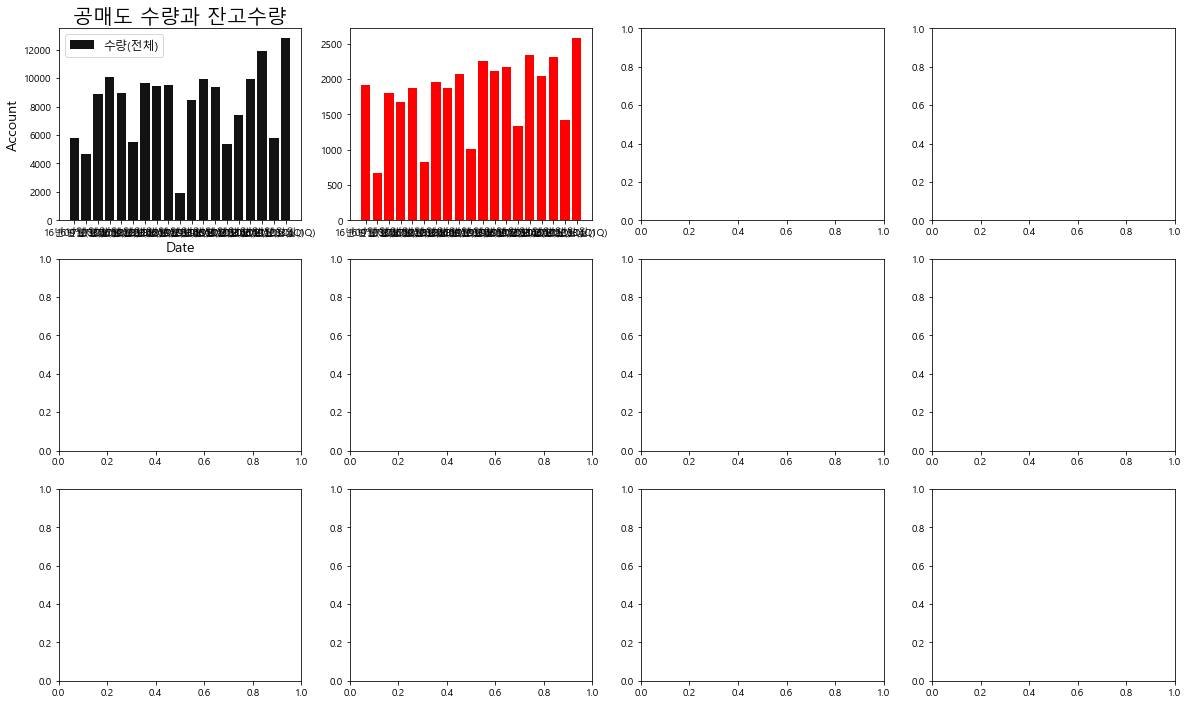

In [83]:
do = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
do1 = do.add_subplot(3,4,1) # subplot 생성
do2 = do.add_subplot(3,4,2) # subplot 생성
do3 = do.add_subplot(3,4,3) # subplot 생성
do4 = do.add_subplot(3,4,4) # subplot 생성
do5 = do.add_subplot(3,4,5) # subplot 생성
do6 = do.add_subplot(3,4,6) # subplot 생성
do7 = do.add_subplot(3,4,7) # subplot 생성
do8 = do.add_subplot(3,4,8) # subplot 생성
do9 = do.add_subplot(3,4,9) # subplot 생성
do10 = do.add_subplot(3,4,10) # subplot 생성
do11 = do.add_subplot(3,4,11) # subplot 생성
do12 = do.add_subplot(3,4,12) # subplot 생성

do1.bar(df1.index,df1['KB 금융'], label='수량(전체)', color='#'+str(12)*3)
do2.bar(df1.index,df1['LG 생활건강'], label='잔고수량', color='r')

do1.set_title('공매도 수량과 잔고수량', fontsize=20) # 타이틀 설정
do1.set_ylabel('Account', fontsize=14) # x축 설정
do1.set_xlabel('Date', fontsize=14) # y축 설정

do1.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'KB 금융')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 생활건강')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 화학')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'NAVER')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'SK 텔레콤')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성물산')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성바이오로직스')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성전자')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '포스코 케미칼')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '한국전력')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대 모비스')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대차')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

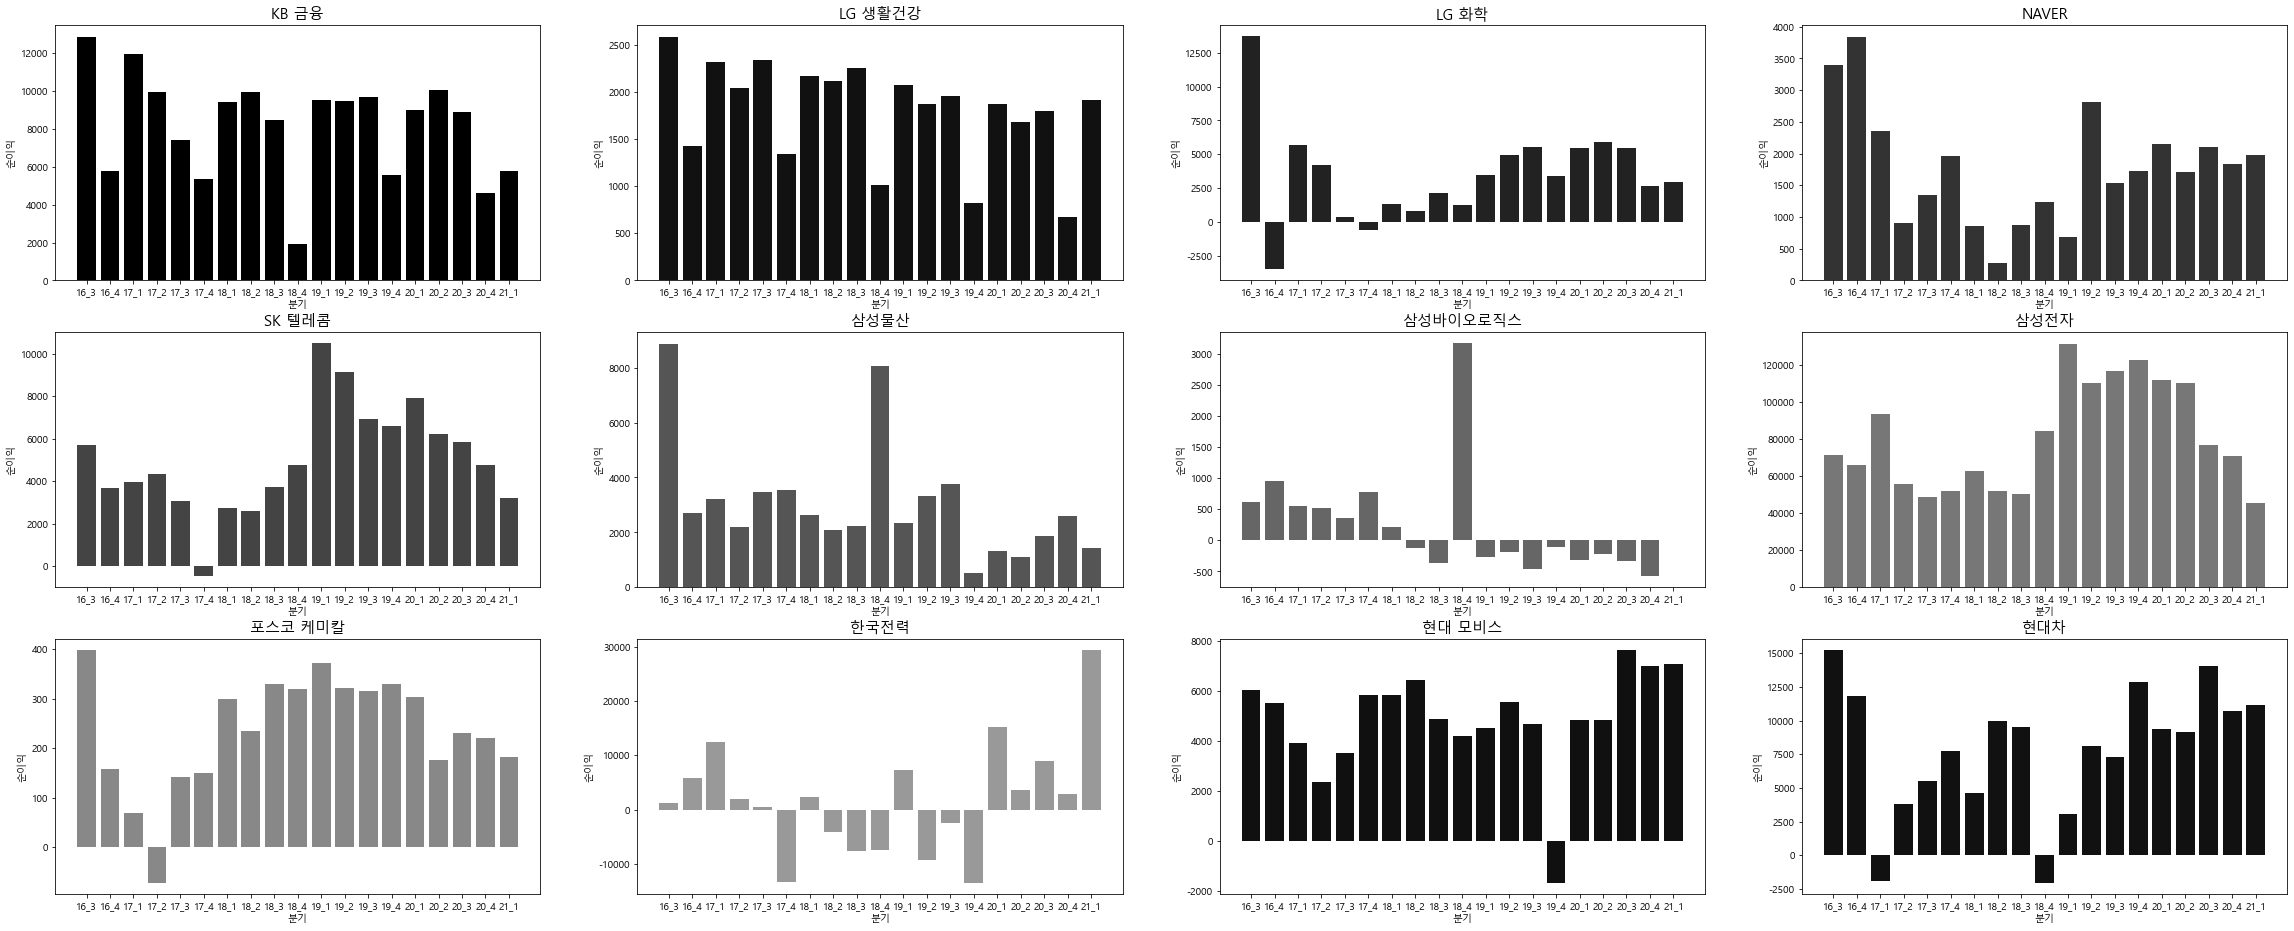

In [84]:
do = plt.figure(figsize=(40, 16)) # 차트 생성 및 사이즈 설정
xtick = ['21_1','20_4','20_3','20_2','20_1','19_4','19_3','19_2','19_1','18_4','18_3','18_2','18_1','17_4','17_3','17_2','17_1','16_4','16_3']
for i in range(len(df1.columns)):
    do1=do.add_subplot(3,4,i+1) # subplot 생성
    do1.bar(xtick,df1[df1.columns[i]], color='#'+str(i)*3)
    do1.set_title(df1.columns[i], fontsize=15) # 타이틀 설정
    do1.set_ylabel('순이익', fontsize=10) # x축 설정
    do1.set_xlabel('분기',fontsize=10) # y축 설정
    do1.invert_xaxis()
plt.show()

In [85]:
do.savefig('./당기순익_시각화.png')